# 선생님 말씀  

* 자꾸 인원을 감축하는 분야로 가지(되돌아가지) 말라  
* AI에서 사람이 하던 일을 기계가 하는 것으로 대체되는 것을 보고도.. 되돌아가는 것은 좋지 않은 결정  


* 음성쪽은 전공 지식이 매우 중요하다.  
* 이쪽으로 가더라도 전공 공부가 필요하며 (대학원 수준)  
* 만약 회사에서 일을 하게 된다면, 얼마나 핵심적인 일을 하게 될지 그리고  
* 향후 공부를 하는 것으로 약속을 하고 취업을 해야 할 것이라고 이야기  
* 음성쪽은 매우 많은 것을 할 줄 알아야 한다.  

# 숙제

* 샘플링 레이트와 비트레이트 공부

# intro

## 단어의 정의  

* sound  
생활 언어같은 느낌이 많이 드는 단어이다.  
소리 그 자체를 의미.  
전문적인 단어는 아니다.  

* acoustics  
음향, hifi(오디오).   
음향 부분은 필요한 것들은 어느정도 이미 다 만들어져 있기 때문에  
더 이상 발전의 여지가 거의 없다고 볼 수 있다.  

* speech  
음성. 우리가 이번 수업에서 다룰 단어로 가장 적합할 것이다.  
음성, 발화, 청취 부분  
sound, acoustics, speech 중 산업적으로 가치가 있는 분야는 바로 이 부분.  
eg. 서비스 현장 (고객 응대)  



음성을 전문적으로 하려면 대학원은 생각해야 함  
어떤 도메인지식이 필요한 게 아니라, 계산 잘하는 공대적 능력이 필요  

앞으로 수업의 방향은..  

* 신호 처리 (전자과 2~3학년)  
책 : 신호와 시스탬  
책 : 디지털 신호처리  
책 : speech recognition : 학부 고학년, 전자과 대학원에서 함  

* 기본 신호 처리  
* 파이썬 기본 사운드 라이브러리  
* pyTorch-Audio 라이브러리  
* 음성 합성 모델 (GAN 기술)  
* API들  

# 신호 처리

* 디지털 신호 처리 시스템  
(1) analog input : 진짜 소리 (공기의 진동, 사람은 성대 > 마이크 수음 > 전기 진동)  
(2) ad converter (analog-digital converter) : 사운드카드가 담당. 요즘은 메인보드 내장. 전기신호를 디지털신호로 바꿔줌   
(3) digital signal processing : PC 프로그램이 담당. 디지털신호를 기반으로 무언가를 함.   
(4) digital-analog converter : 사운드카드가 담당. 디지털신호를 전기신호로 바꿔줌.  
(5) analog output : 스피커가 담당. 전기신호를 공기의 진동으로 변경함.  

1번 단계까지는 아직 디지털 신호가 아님.  

* 아날로그 신호 처리 시스템 (eg. 카세트 테이프)  

(1) analog input : 진짜 소리 (공기의 진동, 사람은 성대 > 마이크 수음 > 전기 진동)  
변환 필요 없음  
(2) analog signal processing : 저항, 컨덴서, 코일, 트랜지스터(증폭 : 진공관이 이 역할을 함), 카세트 테이프 등 전기 회로가 담당  
변환 필요 없음  
(3) analog output : 스피커가 담당. 전기신호를 공기의 진동으로 변경함.  

* (번외) 트랜지스터와 진공관  
증폭을 할 때 트랜지스터와 진공관, 어떤 걸 선택하는 게 좋을까?  
진공관은 실제 오실리스코프로 측정해보면, 재현할 수 있는 주파수 영역대가 오히려 작다.  
즉, 객관적인 성능으로는 비싼 진공관보다 몇백원짜리 트랜지스터가 더 좋다.  
하지만, 진공관의 음성을 따듯하게 느껴, 가치평가를 높게 하는데.. 이는 감성의 영역이 아닐까 라고  
기술하는 사람들은 이야기를 한다고 함.  

* (번외) 왜 디지털 이펙터가 아날로그 이펙터보다 안좋은가?  
예전의 디지털 이펙터는 싸구려 부품들을 썼음.  
최근의 디지털 이펙터는 클라스가 다르다고 함.  

# ADC  
analog - digital - conversion  
아날로그 신호를 디지털 신호로 변경하는 것.  



## 샘플링 레이트  
* 샘플링 : 디지털 신호 처리에서 아날로그 데이터를 디지털 데이터로 추출하는 것  
* 샘플링 레이트 : 단위시간 (주로 초) 당 샘플링 횟수를 의미한다.  
=> 샘플링 레이트가 높을수록 아날로그 신호에 대한 재현력이 높아짐  
=> 하지만 그만큼 연산량이나 용량 또한 커진다.  

https://ko.wikipedia.org/wiki/%EC%83%98%ED%94%8C%EB%A7%81

In [2]:
import numpy as np
import matplotlib.pyplot as plt

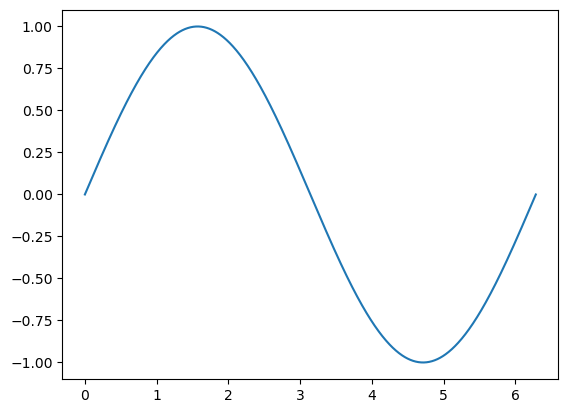

In [3]:
# 아날로그 신호  
# 아날로그 신호의 특징 : 연속적임  
# 아날로그 신호는 자연의 소리이며, 연속적이라는 특징이 있음  
X_analog = np.linspace(0, 2*np.pi, 1000)
y_analog = np.sin(X_analog)

plt.plot(X_analog, y_analog)
plt.show()

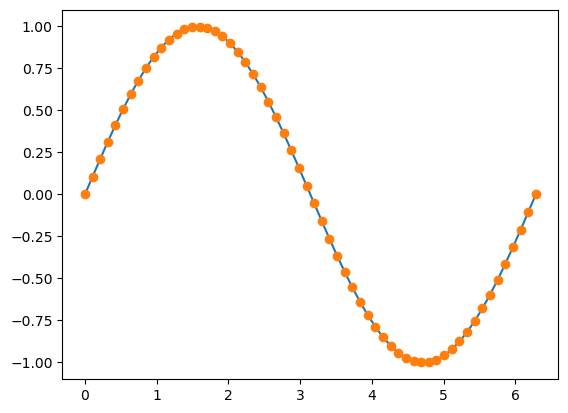

In [4]:
# 디지털 신호  
# 디지털 신호의 특징 : 단절되어있음  
# 곡선 : 아날로그 신호, 주황 점 : 디지털 신호

X_analog = np.linspace(0, 2*np.pi, 1000) ## 이걸 1초의 음성 신호라고 가정하면  
y_analog = np.sin(X_analog)

X_digital = np.linspace(0, 2*np.pi, 60) ## 60이면, sampling rate가 60Hz인 디지털 신호이다.  
y_digital = np.sin(X_digital)

plt.plot(X_analog, y_analog)
plt.plot(X_digital, y_digital, "o")
plt.show()

## sampling rate : 초당 몇 번의 점을 찍는지 (신호를 보내는지)  
## CD음질은 sampling rate가 44,100Hz, 옛날 전화기 및 무전기 : 8,000Hz  
## 일반적인 사람의 음성은 4,000Hz  
## 좋은 고급 기기들은 192,000Hz 정도의 sampling rate를 보여줌  

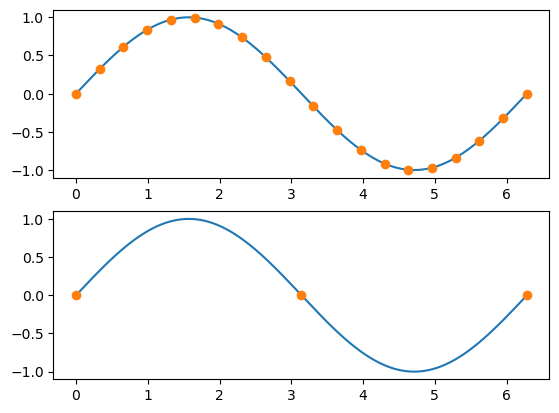

In [5]:
# 디지털 신호에서 주요한 점은,  
# 어느정도로 아날로그 신호를 복원해야 하는지이다.  
# 예를 들어, (1)번은 아날로그 신호를 어느 정도 복원할 수 있지만  
# (2)번은 복원이 불가능하다.  

X_analog = np.linspace(0, 2*np.pi, 1000)
y_analog = np.sin(X_analog)

X_digital = np.linspace(0, 2*np.pi, 20)
y_digital = np.sin(X_digital)

X_digital2 = np.linspace(0, 2*np.pi, 3)
y_digital2 = np.sin(X_digital2)

plt.subplot(2, 1, 1)
plt.plot(X_analog, y_analog)
plt.plot(X_digital, y_digital, "o")

plt.subplot(2, 1, 2)
plt.plot(X_analog, y_analog)
plt.plot(X_digital2, y_digital2, "o")

plt.show()

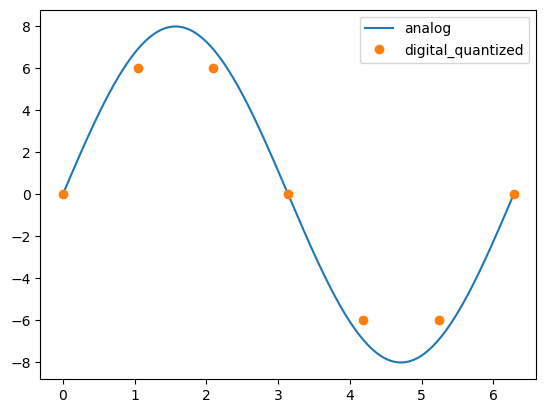

In [16]:
# quantize 효과  
# 아날로그 신호를 디지털 신호로 변경하는데, 제대로 못 잡아내는 경우  
# 표현력을 충분하게 주지 못하면, 아래와 같이 디지털 정보가 빗나가는 경우가 있다.  
# 즉, sampling rate를 충분하게 주지 못하거나 맞지 않게 주면 아래처럼 퀀타이즈가 생긴다.  

bit = 16.0/2.0

X_analog = np.linspace(0, 2*np.pi, 1000) ## 이걸 1초의 음성 신호라고 가정하면  
y_analog = np.sin(X_analog) * bit

X_digital = np.linspace(0, 2*np.pi, 7) ## 60이면, sampling rate가 60Hz인 디지털 신호이다.  
y_digital_int = (np.sin(X_digital) * bit).astype(int) ## 진폭 표현력 (퀀타이즈 ; 양자화) 
## 8bit, 16bit, 24bit ..
## 여기서 bit는 2의 n제곱 : bit가 8bit면 256 진폭이 될 것
## 진폭 : 예를 들어 1~10 의 int로 디지털 변환을 하면 예를 들어 1.5면 10중 0.5가 날아감 -> 큰 영향이 있음
## 하지만 1~255의 int로 변환을 했을 때에는 255중의 0.5는 그렇게 큰 영향이 없음
## 위의 bit 변수를 조절하면서 살펴보자


plt.plot(X_analog, y_analog)
plt.plot(X_digital, y_digital_int, "o")
plt.legend(['analog', 'digital_quantized'])
plt.show()

## 8bit * 8kHz = 64,000 bit per sec
## ---> 이건 뭐지??

## sampling rate는 크면 클수록 좋은데, 연산량은 늘어난다.  
## sampling rate가 작으면 제대로 구현하지 못하는 경우가 있다.

# 소리의 파형에 대해  



* 소리의 파형은 매우 다양한다.  
* 이에 대한 분석은 어떻게 하나?  
* 과학자들은 사인파와 코사인파를 기반으로 분석을 하였음  

그러나 우리는 아날로그 파형을 직접 다루는 게 아니라,  
디지털 파형만을 다룰 것임.  
그래서 **샘플링 레이트** 개념과 ** 진폭 표현력 (퀀타이즈) ** 가 중요.  




## 파형의 종류  
* sin, cos (정현파, sinusoidal signal) : 위에서 예를 든 sin 파형  
* inpulse (임펄스) : 충격. 평온하다가 순간적으로 빵! 하고 일어나는 충격  
* unit function (유닛 펑션) : 소리가 없다가, 일정 시점 이후로 일정한 소리가 등장하는 것  
* exponential function (지수적인 펑션) : 지수적인

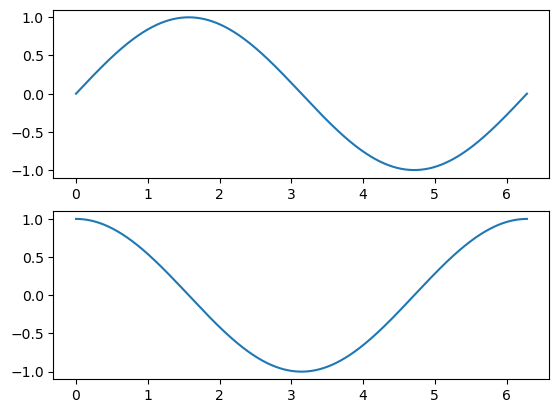

In [22]:
# 정현파

plt.subplot(2,1,1)
X_analog_sin = np.linspace(0, 2*np.pi, 1000)
y_analog_sin = np.sin(X_analog)
plt.plot(X_analog_sin, y_analog_sin)

plt.subplot(2,1,2)
X_analog_cos = np.linspace(0, 2*np.pi, 1000)
y_analog_cos = np.cos(X_analog)
plt.plot(X_analog_cos, y_analog_cos)

plt.show()

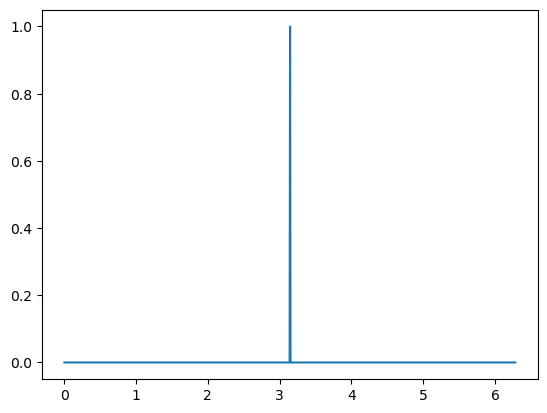

In [17]:
# 임펄스
## 평온하다가 순간적으로 모든 에너지를 빵 하는..  
## 이를 무한으로 본다는데... 사실상은 1로 표현한다? 무슨 말?
## ????????????????

X_analog = np.linspace(0, 2*np.pi, 1000)
y_analog = np.zeros(1000) # 편의상
y_analog[500] = 1

plt.plot(X_analog, y_analog)
plt.show()

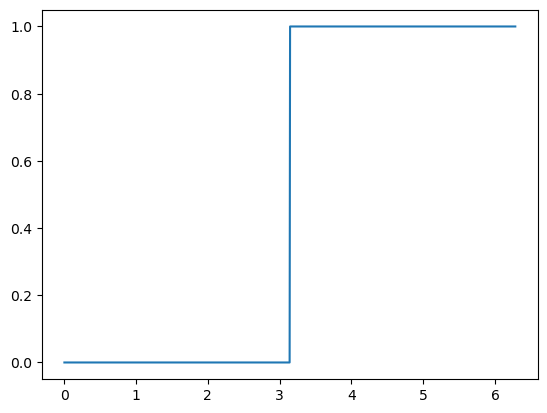

In [18]:
# 유닛 펑션
## 소리가 없다가, 일정 시점 이후로 일정한 소리가 등장하는 것  

X_analog = np.linspace(0, 2*np.pi, 1000)
y_analog = np.zeros(1000) # 편의상
y_analog[500:] = 1

plt.plot(X_analog, y_analog)
plt.show()

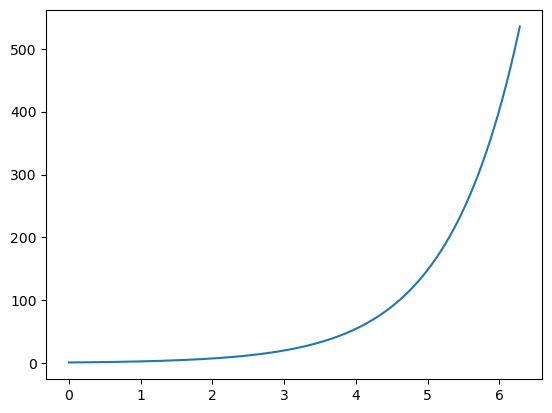

In [20]:
# exeponential function
## 지수적인 증가  
## 예를 들어, 노래방에서 마이크를 켜놓은 채로 바닥에 놓으면  
## 처음엔 이이~ 하는 소리가 작게 나다가 급가속하면서 커지는 경우가 있다.  
## 이 때가 지수적 증가

X_analog = np.linspace(0, 2*np.pi, 1000)
y_analog = np.ones(1000) # 편의상
y_analog = y_analog * np.exp(X_analog) # 1의 지수적 증가 값 (exp : exponential)

plt.plot(X_analog, y_analog)
plt.show()

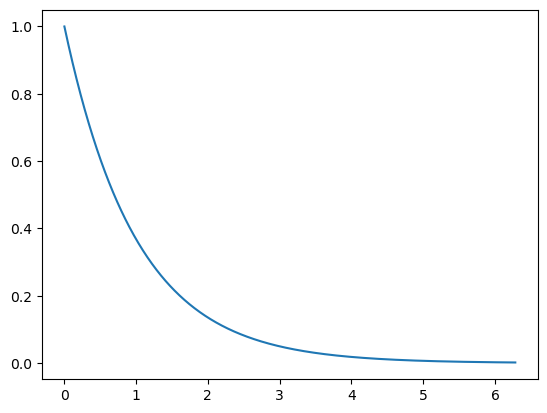

In [21]:
# exeponential function
## 지수적인 감소 또한 있다.  

X_analog = np.linspace(0, 2*np.pi, 1000)
y_analog = np.ones(1000) # 편의상
y_analog = y_analog * np.exp(-X_analog) # 1의 지수적 감소 값 (exp : exponential)

plt.plot(X_analog, y_analog)
plt.show()

## 주파수

* 주파수는 "진동수" 와 같은 의미  
* 진동수(振動數, frequency)는 주기적인 현상이 단위시간 동안 몇 번 일어났는지를 뜻하는 말이다. SI단위로는 헤르츠(Hz)를 쓴다.  
* 1 Hz는 1초에 1번 주기적인 현상이 일어나는 것이고, 2 Hz는 1초에 2번 주기적인 현상이 일어나는 것이다.  



주파수와 진동수를 구분해 보는 경우도 있는데,  
음성을 낼 수 있는 진동의 진동수는 높은데,  
2초에 1주기 뭐 이런 낮은 주파수는 '진동'의 영역으로 본다. (지진 등)  

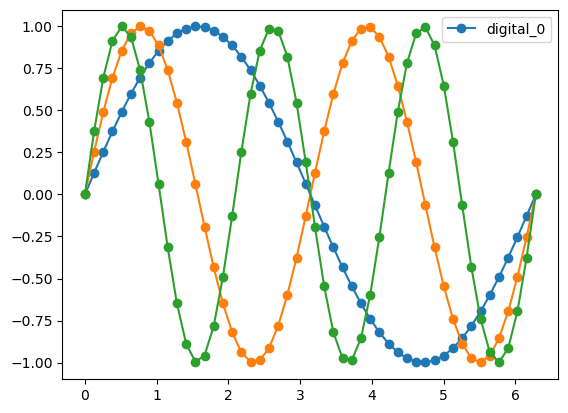

In [29]:
X_digital = np.linspace(0, 2*np.pi, 50)
y_digital = np.sin(X_digital)
y_digital2 = np.sin(X_digital * 2)
y_digital3 = np.sin(X_digital * 3)


plt.plot(X_digital, y_digital, "o-")
plt.plot(X_digital, y_digital2, "o-")
plt.plot(X_digital, y_digital3, "o-")
plt.legend(['digital_0'])
plt.show()

* 주황색 파형은 파란색 파형의 2배이다. 동일 시간에 2배의 파형을 그릴 수 있다.  
* 즉, digital은 1초에 1주기  
* digital2는 1초에 2주기  
* digital3는 1초에 3주기  

단위시간당 신호의 파형이 몇 개가 들어갔냐  
=> "주파수"  

주파수가 높을수록 높은 음이, 낮을수록 낮은 음이 난다.  

남성과 여성을 보면, 어릴 때에는 목소리의 주파수가 비슷하다.  
하지만 2차성징을 할 때 차이가 나타나는데, 남성은 변성기를 지나면서 저음을 내게 된다.  
반면 여성은 거의 비슷한 음역대를 가져가게 된다.  
2차성징을 하면서 남성의 성대는 더 길어지기 때문에 저음을 낼 수 있게 되는 것이다.  

(번외)
* 악기를 튜닝할 때에는 A(라) 음을 기준으로 튜닝을 한다.  
* 왜냐 -> 주파수의 소수점 이하가 0임.  
* 악기를 만드는 사람들은 튜닝보다 길이 치수 등을 기준으로 제작을 시작하기 때문에  
* A음을 튜닝 기준으로 삼는것 같다고 한다.  

![image.png](attachment:34723f6e-f43c-49f0-8703-1279d3cf10f3.png)  


(번외)  
* 소리로 고막에 타격을 주려면 어느정도의 진동수여야 하나?  
* 진동수가 중요한 것이 아니라, 진폭의 크기 (볼륨, 세기)가 중요한 것이다.  


(번외) listen과 hear  
* listen : 집중해서 듣는 것. 능동적임. "뇌가 듣는 것"  
* hear : 들리는 것. 수동적임. "귀가 듣는 것"  

(번외) : psyco-acoustics  

https://en.wikipedia.org/wiki/Psychoacoustics  
음향심리학  

(번외) 선생님 덴마크 회사 협업 이야기  
(1) 우퍼를 장착하면 220Hz - 12kHz까지 출력이 가능  
(2) 일반적인 자동차는 우퍼가 없으니 440Hz - 12kHz까지 출력이 가능  

하지만 한국, 미국사람들은 드라이빙 하면서 - 붕붕 하는 우퍼를 원함  

=> 이에 따라 덴마크 회사에서 아래와 같은 솔루션을 냄  
(하모닉스 이용)  

예를 들어, 원음이  
220 - 440 - 880 - 1000 - 1500을 낸다고 할 때, 
    - 440 - 900 - 1100 - 1600은 다른 소리로 인식한다.  

그래서 덴마크 회사가 낸 솔루션은  
    - 440 - 880 - 1000 - 1500의 소리로 만들어서  
(220)-440 - 880 - 1000 - 1500과 같이 들리도록, 즉
듣는 사람이 "220을 들었을거야" 라고 착각하게끔 한다는 것이다.  

매우 기발한 솔루션인데  
삼성, 현대에서는 이 기술 도입을 거절했다.  
(명장이라고 불리는 음향 기술자들이 몇 명 있는데, 그들이 별로라고 함)  


(번외) : sound - beam  

초지향성 스피커라고 보면 되겠다.  
원래 소리라면 곁에서, 옆에서 들어도 들려야 하는데..  
초지향성 스피커는 딱 그 위치에 있어야 들리게 되는 것이다.  

예전 류이치사카모토전을 갔을 때, 특정 전시물 아래로 가야지만 소리가 들렸었는데  
이 때가 바로 초지향성 스피커, sound-beam 이었을 것이라 추측된다.  

이 또한 한국에서는 "이걸 왜 써야해?" 라는 의문으로 사장됐다고 함.  
그러면서 선생님 말씀 : acoustics는 한국에서 돈이 안됨

## 샘플링 주파수

> 중요

앞으로는 '샘플링 주파수' 라는 말을 자주 쓸 것이다.  
음성학에서는 샘플링 주파수를 f(frequency) 변수로 선언한다.  
단위는 Hz  

예시) 1초 신호에 fs:8000 vs fs:16000  
fs8000 : [0:7999]  
fs16000 : [0:15999]  

샘플링 주파수가 중요한 이유는..  
예를 들어 모르는 음성 데이터를 받았다고 해보자.  
이 데이터를 1초에 몇 번 진동하는 속도로 재생해야 복원이 가능한지 알 수가 없다.  

In [86]:
fs = 100 # 샘플링 주파수. 초당 100번. 그렇다면
dt = 1/fs # 샘플 간 시간은 1/fs가 된다.  
N = 300 # 샘플 개수 N. 여기에, 데이터에 샘플드 된 게 300개가 포함이 되어있다면  
t = 3 # 총 재생 시간은 3초가 된다. (t = N / fs = N * dt)

In [87]:
t = np.arange(0, N) * dt
t
## 결과물은 runtime 중 샘플이 출력되는 시점(초)이 된다.

array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
       0.99, 1.  , 1.01, 1.02, 1.03, 1.04, 1.05, 1.06, 1.07, 1.08, 1.09,
       1.1 , 1.11, 1.12, 1.13, 1.14, 1.15, 1.16, 1.17, 1.18, 1.19, 1.2 ,
       1.21, 1.22, 1.23, 1.24, 1.25, 1.26, 1.27, 1.28, 1.29, 1.3 , 1.31,
       1.32, 1.33, 1.34, 1.35, 1.36, 1.37, 1.38, 1.39, 1.4 , 1.41, 1.42,
       1.43, 1.44, 1.45, 1.46, 1.47, 1.48, 1.49, 1.

예시 ) 여기선 진폭을 함께 다룰 것이다.  
(소리의 크기. 주파수는 같으나 진폭은 다를 수 있다.)

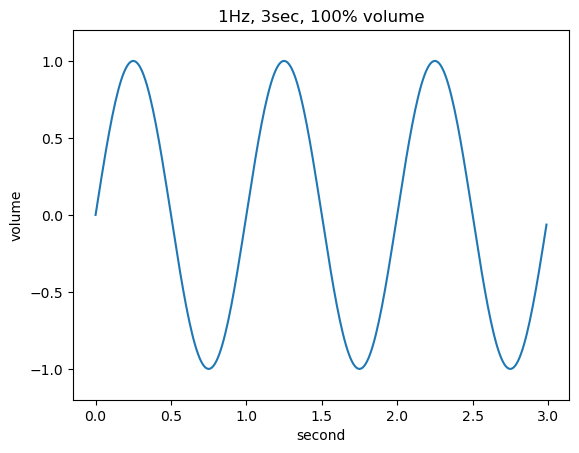

In [88]:
signal_1 = 1.0 * np.sin(2 * np.pi * 1 * t)
# f(주파수) = 1, amp(볼륨) = 1.0 인 그래프

plt.plot(t, signal_1)
plt.xlabel('second') # 시간흐름(초)
plt.ylabel('volume') #세기. 진폭
plt.title('1Hz, 3sec, 100% volume')
plt.ylim(-1.2, 1.2)
plt.show()

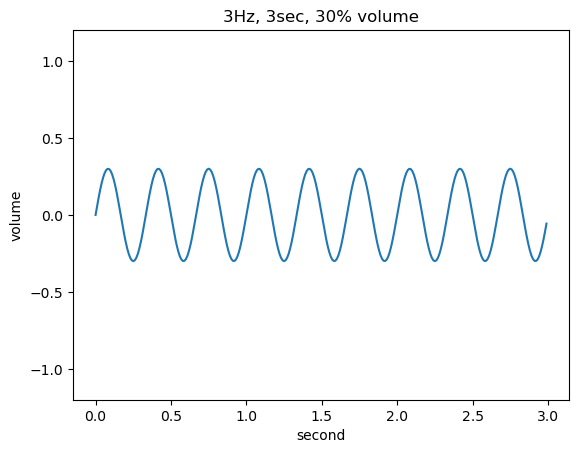

In [89]:
signal_2 = 0.3 * np.sin(2 * np.pi * 3 * t)
# 이전 signal 대비 3배 주파수가 되었고 = 음높이는 3배가 됨
# 음량은 30%로 줄어듦

plt.plot(t, signal_2)
plt.xlabel('second') # 시간흐름(초)
plt.ylabel('volume') #세기. 진폭
plt.title('3Hz, 3sec, 30% volume')
plt.ylim(-1.2, 1.2)
plt.show()

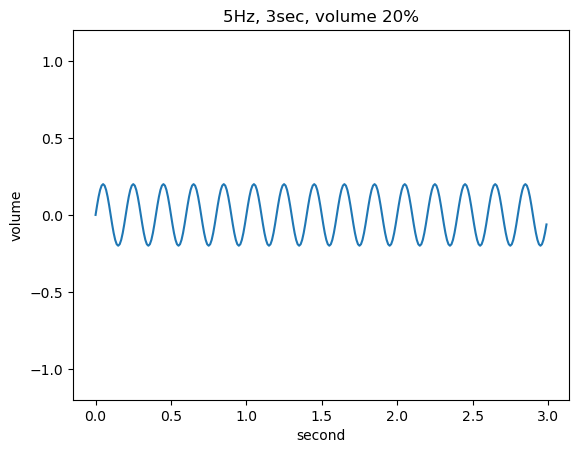

In [90]:
f = 5
amp = 0.2

signal_3 = amp * np.sin(2 * np.pi * f * t)
# 이전 signal 대비 5배 주파수가 되었고 = 음높이는 5배가 됨
# 음량은 20%로 줄어듦

plt.plot(t, signal_3)
plt.xlabel('second') # 시간흐름(초)
plt.ylabel('volume') #세기. 진폭
plt.title('5Hz, 3sec, volume 20%')
plt.ylim(-1.2, 1.2)
plt.show()

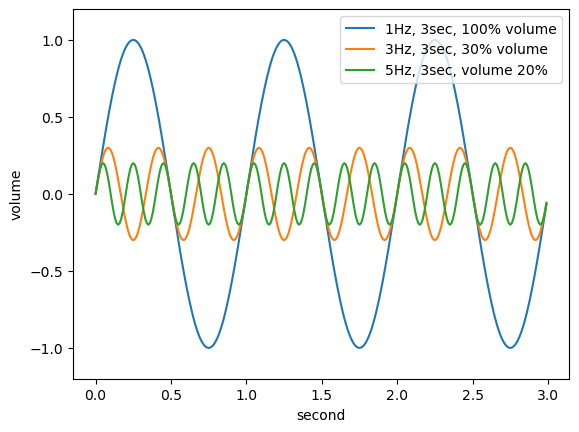

In [91]:
# 세 개의 파형을 한꺼번에 그리면

plt.plot(t, signal_1)
plt.plot(t, signal_2)
plt.plot(t, signal_3)

plt.legend(['1Hz, 3sec, 100% volume', '3Hz, 3sec, 30% volume', '5Hz, 3sec, volume 20%'])

plt.ylim([-1.2, 1.2])
plt.xlabel('second')
plt.ylabel('volume')
plt.show()

# 그런데 과연 우리 귀에 이렇게 나뉘어져서 들릴까?  
# 예를 들어, 도미솔을 동시에 쳤다고 해보자. 그러면..

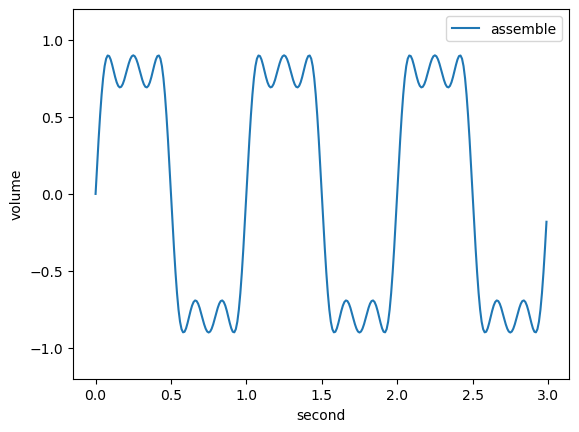

In [92]:
# 동시에 여러 음이 들릴 경우 아래처럼 들린다.

plt.plot(t, signal_1 + signal_2 + signal_3)

plt.legend(['assemble'])

plt.ylim([-1.2, 1.2])
plt.xlabel('second')
plt.ylabel('volume')
plt.show()

# 아래처럼 들리며, 우리의 뇌가 이를 분리해서 위 표처럼 듣게 된다.  

## 주파수 분석

fft 주파수 분석을 통해, 주파수대별로의 출력을 보는 것 ???  
Fast Fourier Transform  
https://ko.wikipedia.org/wiki/%EA%B3%A0%EC%86%8D_%ED%91%B8%EB%A6%AC%EC%97%90_%EB%B3%80%ED%99%98  

(참고)  
푸리에 변환(Fourier transform, FT)은 시간이나 공간에 대한 함수를 시간 또는 공간 주파수 성분으로 분해하는 변환을 말한다. 종종 이 변환으로 나타난 주파수 영역에서 함수를 표현한 결과물을 가리키는 용어로도 사용된다. 조제프 푸리에가 열전도에 대한 연구에서 열 방정식의 해를 구할 때 처음 사용되었다.

푸리에변환 기현이 설명  
모든 곡선 그래프는 삼각함수들의 합으로 나타낼 수 있다.  
그러니 곡선으로 그려진 그래프라면, 여러 삼각함수들로 분해를 할 수 있다는 이야기.  
여기에 주파수는 이산형으로 나타낼 수 있다.  
이 말은, 1Hz 주파수대, 2Hz 주파수대 ... 로 나눠 표현할 수 있다는 이야기.
이를 합쳐서 이야기해보면  
여러 소리가 합쳐진 어떤 소리 (곡선 형태의 그래프로 그려질 수 있음)는 분해해  
각각의 삼각함수(=주파수대)별로 그 크기(진폭) 등을 나타낼 수 있다는 것.  

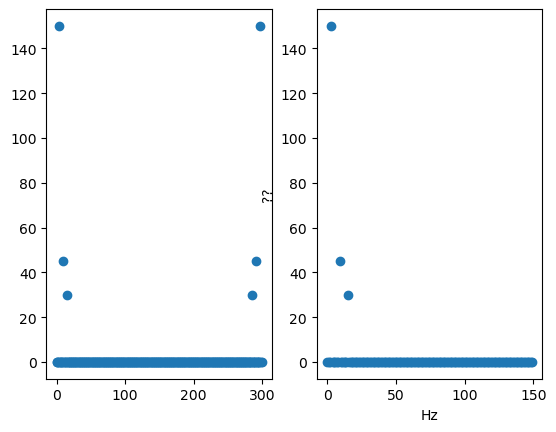

In [96]:
df = fs / N # 주파수 간격

N = 300
f = np.arange(0, N)
signals = signal_1 + signal_2 + signal_3
Xf = np.fft.fft(signals)
## fft : 넘파이의 주파수 분석 툴
## fast fourier transform

plt.subplot(1,2,1)
plt.plot(f, np.abs(Xf), "o")

plt.subplot(1,2,2)
plt.plot(f[:int(N/2)], np.abs(Xf[:int(N/2)]), "o")

plt.xlabel('Hz')
plt.ylabel('??')
plt.show()

# 여기서 도출해야 할 것은.. 
# 이 주파수는 대칭이며, 따라서 반만 써도 된다~ 로 할 수 있다.

### 숙제, 이건 왜 이러는 것이지? (위)

* 알면 좋음. 디테일한 부분이기 때문  
* 책 "신호와 시스템"  
* 하지만, 넘파이가 대신 해줌

In [97]:
# Xf를 둘러보자
## 여기 숫자엔 j가 보임
## j는 복소수

Xf

array([-9.49612074e-16+0.00000000e+00j, -6.49443331e-15-3.46944695e-15j,
        2.45839036e-14+1.69475101e-15j, -2.23802392e-14-1.50000000e+02j,
        2.72907074e-14-1.59615610e-15j, -7.44280669e-15+6.10108151e-15j,
       -7.52298851e-15+4.91623916e-15j,  9.16477750e-15-7.37772628e-15j,
        1.21369046e-14+8.29462552e-15j, -2.02253291e-14-4.50000000e+01j,
        1.11155952e-14+6.46459140e-16j, -8.08135847e-16-7.86968886e-16j,
        1.33235722e-15+3.14752304e-15j,  1.41587702e-15+1.07676317e-14j,
        5.44933793e-15+1.17592415e-15j, -1.06661217e-14-3.00000000e+01j,
        5.43012170e-15+1.04442622e-14j, -6.53210487e-15-9.23497786e-15j,
        7.60464230e-15-1.61555798e-15j, -2.65121255e-15+2.54595674e-15j,
        6.36712652e-15-7.25898515e-15j,  3.10761800e-15-8.63684496e-15j,
        1.05868710e-14+8.10036303e-15j, -1.65954845e-15+4.80164865e-15j,
        2.83040939e-15-2.51856056e-15j, -7.42088647e-17+4.35646133e-15j,
        4.79597479e-15-4.73333912e-15j,  1.93451412

* 복소수가 나오는 이유 = 오일러 공식 때문

* 허수개념, 복소수... 등등이 나오는데  

* 허수 = 제곱해서 -1이 되는 수.  
* 실제로는 찾아볼 수 없는 수이므로 '허수'라고 하며 개념적으로만 계산한다.  

* 복소수 = 실수와 허수를 더한 수

따라서 임의의 복소수는 2개의 실수 a, b를 사용한 a＋bi인 형식으로 표현된다. 복소수 a＋bi에서 b≠0인 경우 a＋bi를 허수라 하고, a＝0이면 순허수

그러면 왜 위에선 절대값 처리를 하는가? (abs)

우리는 해당 주파수영역대의 '크기(진폭)'만 필요할 뿐이다.  
따라서 볼륨을 구하려면 복소수의 '절대값'을 구할 필요가 있다.  
(복소수에 포함된 허수는 제곱해서 -1이 되는 수이기 때문)


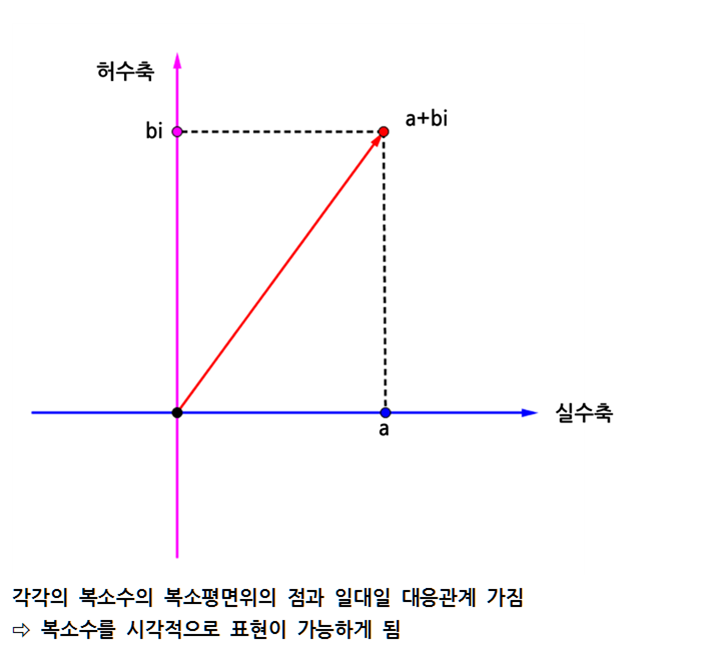

MFCC에서는 위 주파수 분석 그래프를 시간별로 쌓은 것이다.

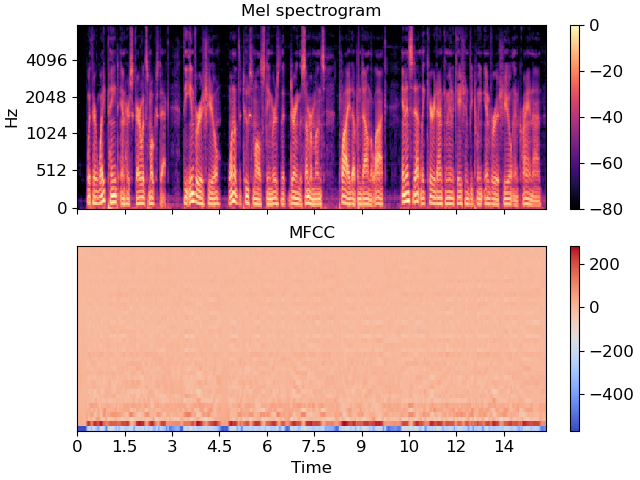

X축 = 시간  
Y축 = 주파수대  
색깔 = 볼륨  

## 모듈레이션

am 라디오, fm 라디오.  
이는 am 모듈레이션, fm 모듈레이션을 뜻한다.  

사람의 목소리는 기본적으로 낮은 진동수를 가지므로, 멀리 가지 못한다.  
그런데 사람의 목소리를 멀리 보낼 수 있는 방법이 고안됐는데..  
바로 높은 진동수를 가진 주파수대에 사람의 목소리를 실어 보내는 것  


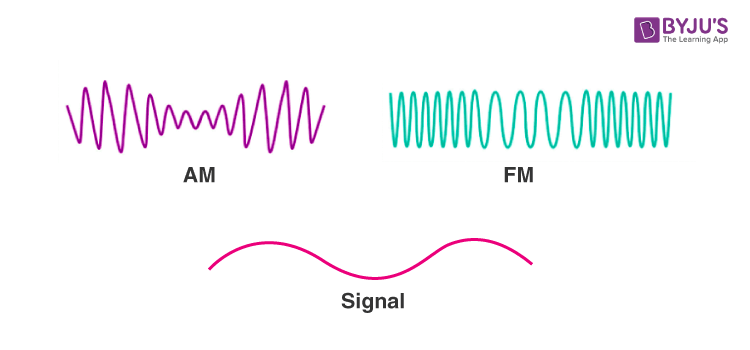

am은 신호를 아래처럼 보낸다.  

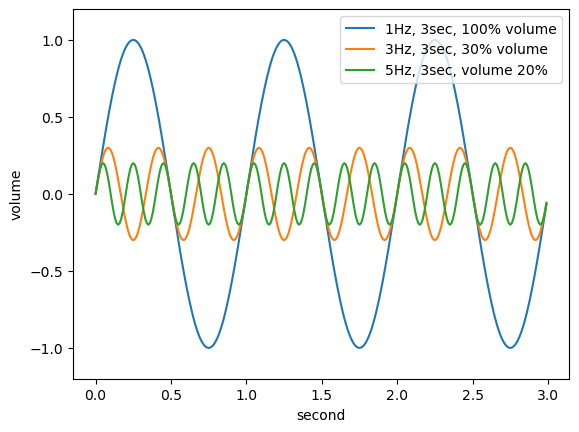

In [98]:
# am 모듈레이션

plt.plot(t, signal_1)
plt.plot(t, signal_2)
plt.plot(t, signal_3)

plt.legend(['1Hz, 3sec, 100% volume', '3Hz, 3sec, 30% volume', '5Hz, 3sec, volume 20%'])

plt.ylim([-1.2, 1.2])
plt.xlabel('second')
plt.ylabel('volume')
plt.show()

# 그런데 과연 우리 귀에 이렇게 나뉘어져서 들릴까?  
# 예를 들어, 도미솔을 동시에 쳤다고 해보자. 그러면..

fm은 아래처럼 합쳐서 보냄  

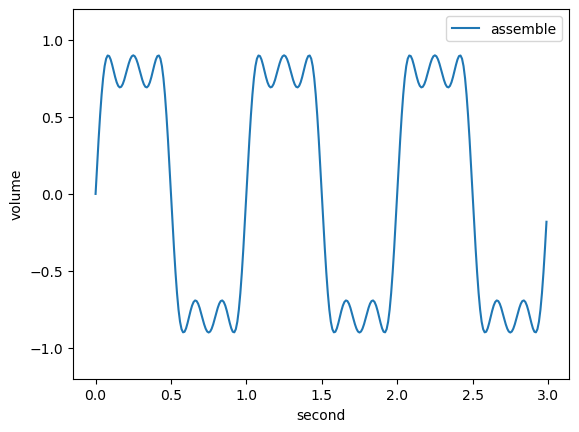

In [99]:
# fm 모듈레이션

plt.plot(t, signal_1 + signal_2 + signal_3)

plt.legend(['assemble'])

plt.ylim([-1.2, 1.2])
plt.xlabel('second')
plt.ylabel('volume')
plt.show()

여기에 더해, filter 개념도 추가로 알면 좋은데,  
라디오에서 수신하는 신호는 넓은 주파수대 신호를 받으나,  
이 중에서 사람 목소리 및 음악을 담을 수 있는 주파수대만 남기고 나머지는 날려버린다.  

이를 주파수 필터라고 하며,  
이를 통해 우리는 라디오를 통해 필요한 주파수대만 들을 수 있는 것

## 하모닉스

파형을 만들어내는 소리의 원천을 구분하기 위해서는 파형을 봐야 하는데..  
그중에서도 파형의 '하모닉스'를 살펴봐야 한다.  

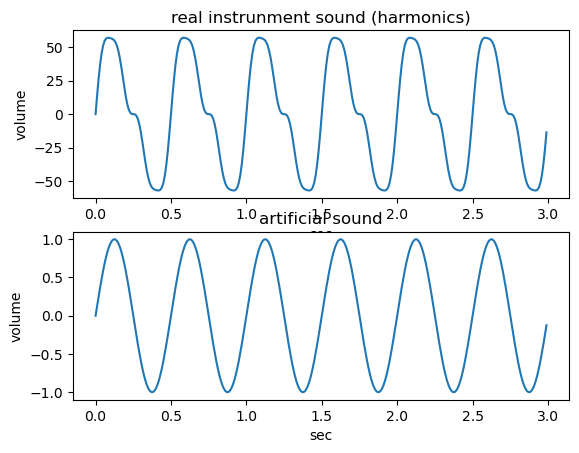

In [171]:
# 하모닉스 (배음) 
# 실제 악기는 특정 주파수만을 쭉 내는 것이 아니다.  
# 실제 악기는 특정 Hz를 연주하면, 그 2배, 또 그의 2배 .... 음들이 작게 나온다.
# 그리고 관악기, 현악기, 그리고 각 기어들간 배음이 나타내는 성향 등에 따라 구분을 할 수 있다.
# 아래 예시를 보자

fs = 100
dt = 1/fs
N = 300
t = np.arange(0, N) * dt

signals = 0
amps = [0, 1, 0, 0.3, 0, 0, 0, 0.1, 0, 0] # 배음 : 2, 4, 8 ... 번째에 배음(하모닉스)가 발생함

for f, amp in enumerate(amps):
    signals += (10 - i) * amp * np.sin( 2* np.pi * (f+1) * t)

plt.subplot(2, 1, 1)
plt.plot(t, signals)
plt.title('real instrunment sound (harmonics)')
plt.xlabel('sec')
plt.ylabel('volume')

signals = 0
amps = [0, 1, 0, 0, 0, 0, 0, 0, 0, 0] # 배음이 없는 인위적인 소리

for f, amp in enumerate(amps):
    signals += amp * np.sin( 2* np.pi * (f+1) * t)
    
plt.subplot(2, 1, 2)
plt.plot(t, signals)
plt.title('artificial sound')
plt.xlabel('sec')
plt.ylabel('volume')

plt.show()

이를 왜 음성 분석을 설명하는 데 이야기하느냐,  
모음의 구분, 자음의 구분 등은 "하모닉스"를 통해 구분하는 것이기 때문이다.  

사람의 말은 소리의 높낮이, 볼륨의 크기 등이 다를 수는 있지만,  
특정 발음이 일으키는 하모닉스엔 공통점이 있기 때문에  
이 발음 파형의 패턴을 파악해 stt가 구현되는 것이다.  

# 다시 ADC 쪽으로 돌아가서..

## Nyquist sampling theory

원본이 f인 주파수가 있을 때,  
이를 디지털로 변환했을 때 몇 번의 진동수를 주어야 하는가? 에 대한 내용  

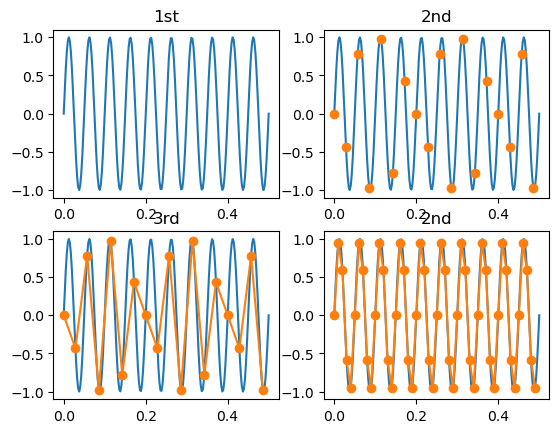

In [127]:
f = 20 # 진동수 Hz 초당 20번
t = np.linspace(0, 0.5, 200)
x1 = np.sin(2.0 * np.pi * f * t)

fs = 35 # 진동수 Hz 초당 35번
T = 1/fs # 1주기 시간
n = np.arange(0, 0.5/T)
nT = n * T
x2 = np.sin(2.0 * np.pi * f * nT)

# 원본 그래프
plt.subplot(2, 2, 1)
plt.plot(t, x1)
plt.title('1st')

# 원본 그래프 위에 두 번째 그래프를 점으로 그려봄
plt.subplot(2, 2, 2)
plt.plot(t, x1)
plt.plot(nT, x2, "o")
plt.title('2nd')

# 원본 그래프와 두 번째 그래프를 함께 그려봄
## 이걸 이어봤을 때 ==> 매칭/원복이 안됨
plt.subplot(2, 2, 3)
plt.plot(t, x1)
plt.plot(nT, x2, "o-")
plt.title('3rd')

# 여기서 진동수를 더 높여 보면 (fs)
# 원본을 어느정도 따라가는 걸 볼 수 있다.
fs = 100
T = 1/fs
n = np.arange(0, 0.5/T)
nT = n * T
x2 = np.sin(2.0 * np.pi * f * nT)
plt.subplot(2, 2, 4)
plt.plot(t, x1)
plt.plot(nT, x2, "o-")
plt.title('2nd')

plt.show()


나이키스트 샘플링은 공식으로 증명이 된 것이다.  
나이키스트 샘플링은
원본 아날로그 신호의 진동수가 f일 때,  
이에 대한 디지털 샘플링 레이트 fs는 최소 2배 이상이 되어야 한다는 것.  

하지만 산업군에서는 "그 말도 맞지만, 더욱 원본 복원이 가능하게끔 하려면  
그것보다 더 (10배 이상) 써야 원본에 가깝게 할 수 있다" 라고 이야기한다.  

수학적으로는 2배면 충분하다고 결론지어졌지만,  
현실 산업에서는 그게 충분치 않은 방증 중 하나.  

예를 들어, 사람의 음성은 4000Hz 정도라고 한다.  
그러면 전화 음질은.. 수학적 나이키스트 샘플링을 통하면 8000Hz 정도면 충분히 복원이 가능해야 한다.  
8000Hz 정도면 무전기 혹은 옛날 전화기 정도가 된다.  

생각해보면 무전기나 옛날 전화기는 그리 좋은 음질, 명확한 음질은 아니다.  
즉, 실제로 겪어보면 안그렇다는 이야기..  

근데 생각해보면 공식은 완벽한데, 이걸 구현하는 하드웨어의 한계일 가능성은 없나?  

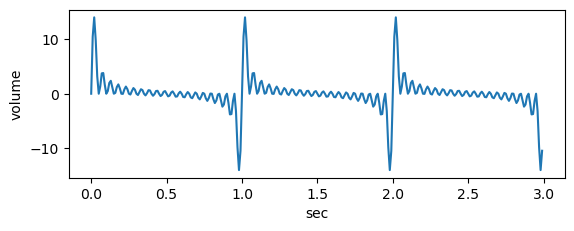

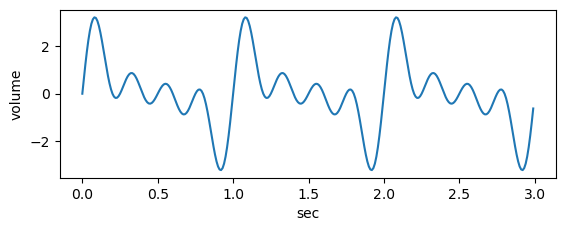

In [153]:
# 1 ~ 20 Hz 파형을 더해보기

fs = 100
dt = 1/fs
N = 300
t = np.arange(0, N) * dt

signals = 0
amp = 1

for f in range(1, 20):
    signals += amp * np.sin( 2* np.pi * f * t)

plt.subplot(2, 1, 1)
plt.plot(t, signals)
plt.xlabel('sec')
plt.ylabel('volume')
plt.show()

signals = 0
amp = 1

for f in range(1, 5):
    signals += amp * np.sin( 2* np.pi * f * t)

plt.subplot(2, 1, 1)
plt.plot(t, signals)
plt.xlabel('sec')
plt.ylabel('volume')
plt.show()

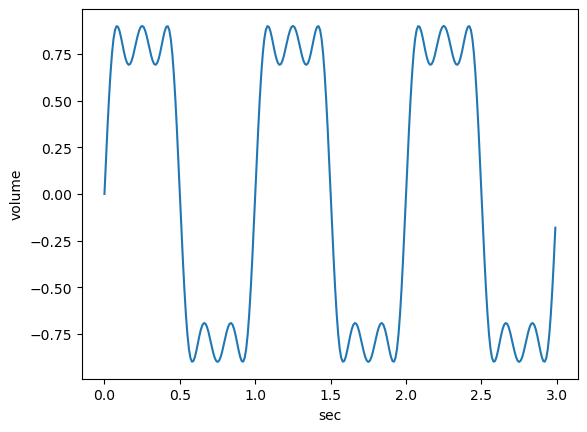

In [155]:
# 저~ 위에서 만들었던 파형 복원해보기 

fs = 100
dt = 1/fs
N = 300
t = np.arange(0, N) * dt

signals = 0
amps = [1, 0, 0.3, 0, 0.2, 0, 0, 0, 0, 0]

for f, amp in enumerate(amps):
    signals += amp * np.sin( 2* np.pi * (f+1) * t)
    
plt.plot(t, signals)
plt.xlabel('sec')
plt.ylabel('volume')
plt.show()

## 우리는 몇 개의 주파수대가 있을 지 모르기 때문에  
## 음악 합성의 틀을 만들 때에는 이러한 식으로 모든 주파수대(f)를 염두에 두고 = list.index = 1~10
## 각 주파수의 volume 들을 지정해주어, = amp
## 그에 맞는 음성을 만들 수 있는 것이다.  
## 이것이 바로 음성 합성

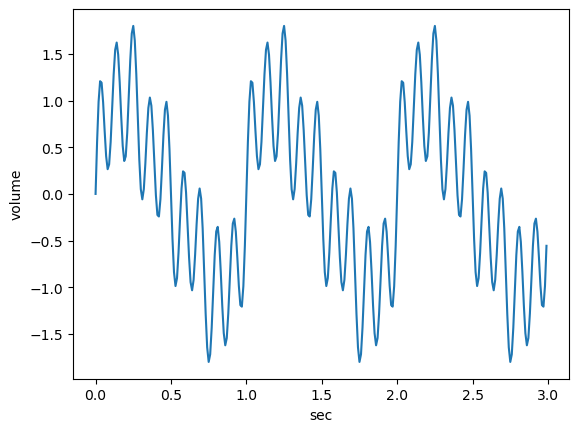

In [156]:
# 볼륨을 다르게 주면

fs = 100
dt = 1/fs
N = 300
t = np.arange(0, N) * dt

signals = 0
amps = [1, 0.3, 0.1, 0, 0.2, 0, 0.5, 0, 0.7, 0] # 주파수 성분

for f, amp in enumerate(amps):
    signals += amp * np.sin( 2* np.pi * (f+1) * t)
    
plt.plot(t, signals)
plt.xlabel('sec')
plt.ylabel('volume')
plt.show()

## 우리는 몇 개의 주파수대가 있을 지 모르기 때문에  
## 음악 합성의 틀을 만들 때에는 이러한 식으로 모든 주파수대(f)를 염두에 두고 = list.index = 1~10
## 각 주파수의 volume 들을 지정해주어, = amp
## 그에 맞는 음성을 만들 수 있는 것이다.  
## 이것이 바로 음성 합성

## 요즘은 이 기술을 바탕으로, 딥러닝을 통해 프레디 머큐리의 목소리를 따라 만든다던가 하는 것들을 함.

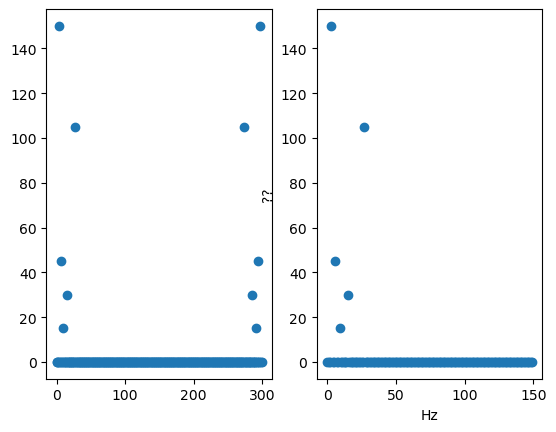

In [159]:
# 이걸 주파수 분석을 해보면

df = fs / N # 주파수 간격

N = 300
f = np.arange(0, N)
Xf = np.fft.fft(signals)

plt.subplot(1,2,1)
plt.plot(f, np.abs(Xf), "o")

plt.subplot(1,2,2)
plt.plot(f[:int(N/2)], np.abs(Xf[:int(N/2)]), "o")

plt.xlabel('Hz')
plt.ylabel('??')
plt.show()

# 할 것

음성이라면 : 안내 하는 목소리를 연예인이나 가수의 목소리로 하고,  
음성 인식을 통해 발표를 진행 (슬라이드 넘기기 등)

In [128]:
a = '''
1
3
26 
28 
34 
56 
75 
98
'''

a = [ int(x) for x in a.strip().split('\n') ]
print(f'최대값 : {max(a)}')
print(f'행넘버 : {a.index(max(a))}')

최대값 : 98
행넘버 : 7
